In [4]:
import pandas as pd
import os

directory_path = 'Result_Done/'

csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

data_frames = []
for file in csv_files:
    file_path = os.path.join(directory_path, file)
    df = pd.read_csv(file_path)
    data_frames.append(df)

combined_df = pd.concat(data_frames, ignore_index=True)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
transaction_type = ctrl.Antecedent(np.arange(0, 2, 1), 'transaction_type')
pep_involvement = ctrl.Antecedent(np.arange(0, 2, 1), 'pep_involvement')
cross_border = ctrl.Antecedent(np.arange(0, 2, 1), 'cross_border')
country_risk = ctrl.Antecedent(np.arange(0, 2, 1), 'country_risk')

risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')

# Define the membership functions
transaction_type['low'] = fuzz.trimf(transaction_type.universe, [0, 0, 1])
transaction_type['high'] = fuzz.trimf(transaction_type.universe, [0, 1, 1])

pep_involvement['low'] = fuzz.trimf(pep_involvement.universe, [0, 0, 1])
pep_involvement['high'] = fuzz.trimf(pep_involvement.universe, [0, 1, 1])

cross_border['low'] = fuzz.trimf(cross_border.universe, [0, 0, 1])
cross_border['high'] = fuzz.trimf(cross_border.universe, [0, 1, 1])

country_risk['low'] = fuzz.trimf(country_risk.universe, [0, 0, 1])
country_risk['high'] = fuzz.trimf(country_risk.universe, [0, 1, 1])

risk['low'] = fuzz.trimf(risk.universe, [0, 0, 50])
risk['medium'] = fuzz.trimf(risk.universe, [30, 50, 70])
risk['high'] = fuzz.trimf(risk.universe, [60, 100, 100])


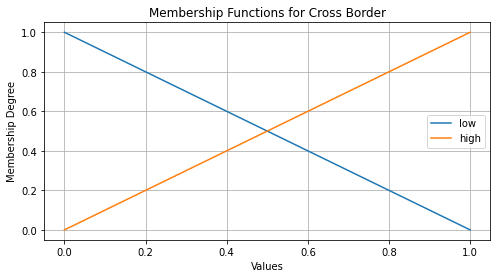

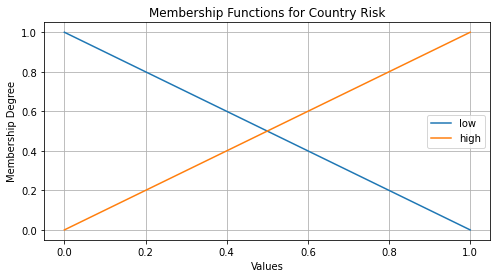

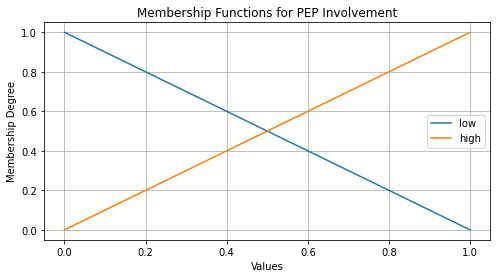

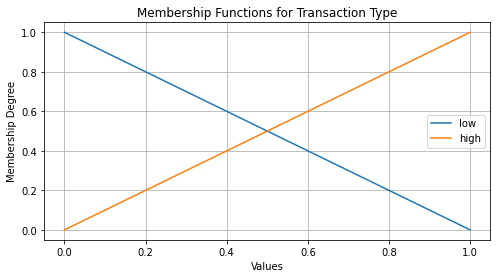

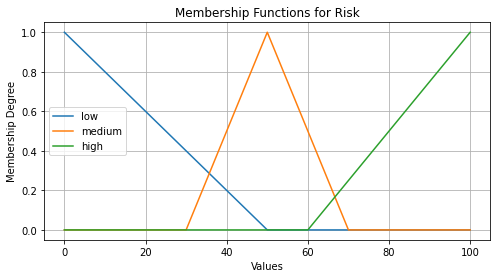

In [6]:

def plot_membership_with_data(variable, data, title):
    plt.figure(figsize=(8, 4))
    for term_name, term in variable.terms.items():
        plt.plot(variable.universe, term.mf, label=f'{term_name}')
        if term_name in data.columns:
            # Calculate membership values for data points
            membership_values = fuzz.interp_membership(variable.universe, term.mf, data[term_name].dropna())
            plt.scatter(data[term_name].dropna(), membership_values, s=10, label=f'Data for {term_name}')
    plt.title(title)
    plt.xlabel('Values')
    plt.ylabel('Membership Degree')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_membership_with_data(cross_border, combined_df, 'Membership Functions for Cross Border')
plot_membership_with_data(country_risk, combined_df, 'Membership Functions for Country Risk')
plot_membership_with_data(pep_involvement, combined_df, 'Membership Functions for PEP Involvement')
plot_membership_with_data(transaction_type, combined_df, 'Membership Functions for Transaction Type')
plot_membership_with_data(risk, combined_df, 'Membership Functions for Risk')
